<a href="https://colab.research.google.com/github/Utkarsh-Mishra-dev/BE_EE_Project/blob/main/2024_year_model_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction
As a part of this project, we have successfully collected the data to be used for load forecasting i.e the data of the NCT of Delhi.

#Importing Libraries

In [176]:
import numpy as np  #importing numpy, the library used for implementing arrays in Python
import pandas as pd  # importing pandas library that provide us with a dataframe structure, on which we can do preprocessing stuff
import seaborn as sb #importing seaborn library
import matplotlib.pyplot as plt #importing matplotlib for plotting graphs
from sklearn.model_selection import train_test_split #importing train_test_split to split the data into X (feature variables) and y (target variable)

#Reading the file

In [177]:
df = pd.read_csv("/content/PROJECT DATA_BE_FINAL YEAR_2024-25.csv") #line of code to convert our csv file into the dataframe

#EDA
##For Whole dataset
Exploratory Data Analysis (EDA) is a fundamental phase in the data analysis process that involves examining and visualizing data sets to uncover their main characteristics.
Visualization plays a crucial role in EDA, as tools such as histograms, scatter plots, and box plots help illustrate relationships, distributions, and trends within the data.

In [178]:
df #Our dataframe

,PRECIPITATION,MAXIMUM TEMPERATURE,MINIMUM TEMPERATURE,WIND SPEED,HUMIDITY,SOLAR RADIATION,MAXIMUM DEMAND (IN MW)
0,0.000,22.3,5.8,9.4,70.1,160.9,4472.0
1,0.000,22.7,7.9,11.2,70.6,164.5,4228.0
2,0.000,19.9,7.0,21.1,83.1,166.9,4331.0
3,0.000,17.7,8.0,21.5,87.3,134.3,4461.0
4,0.000,20.9,7.6,21.6,78.8,165.6,4170.0
...,...,...,...,...,...,...,...
2156,44.597,16.0,13.9,18.4,94.3,42.0,4730.0
2157,5.104,16.0,13.0,9.4,96.1,35.2,4723.0
2158,0.000,16.5,11.0,18.4,93.5,129.3,4726.0
2159,0.000,13.9,9.0,14.8,92.9,149.1,5046.0


In [179]:
df.shape # (number of rows, number of columns)

(2161, 7)

In [180]:
df.info() #data type information of different columns of our dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2161 entries, 0 to 2160
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PRECIPITATION           2161 non-null   float64
 1   MAXIMUM TEMPERATURE     2161 non-null   float64
 2   MINIMUM TEMPERATURE     2161 non-null   float64
 3   WIND SPEED              2161 non-null   float64
 4   HUMIDITY                2161 non-null   float64
 5   SOLAR RADIATION         2161 non-null   float64
 6   MAXIMUM DEMAND (IN MW)  2161 non-null   float64
dtypes: float64(7)
memory usage: 118.3 KB


In [181]:
df.describe() #statistical analysis of the data

,PRECIPITATION,MAXIMUM TEMPERATURE,MINIMUM TEMPERATURE,WIND SPEED,HUMIDITY,SOLAR RADIATION,MAXIMUM DEMAND (IN MW)
count,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000
mean,2.719544,31.014715,20.016196,15.601018,64.828320,214.584544,4823.377001
std,12.010616,7.233933,7.574453,5.548040,18.458473,62.540512,1167.242994
min,0.000000,9.100000,3.000000,5.400000,17.800000,4.100000,2163.000000
25%,0.000000,25.800000,13.000000,11.200000,54.000000,168.700000,3878.000000
50%,0.000000,32.800000,21.700000,14.800000,67.100000,210.400000,4584.000000
75%,0.000000,36.000000,26.900000,18.400000,78.700000,265.300000,5690.000000
max,203.047000,47.000000,34.800000,63.400000,99.300000,335.200000,8656.000000


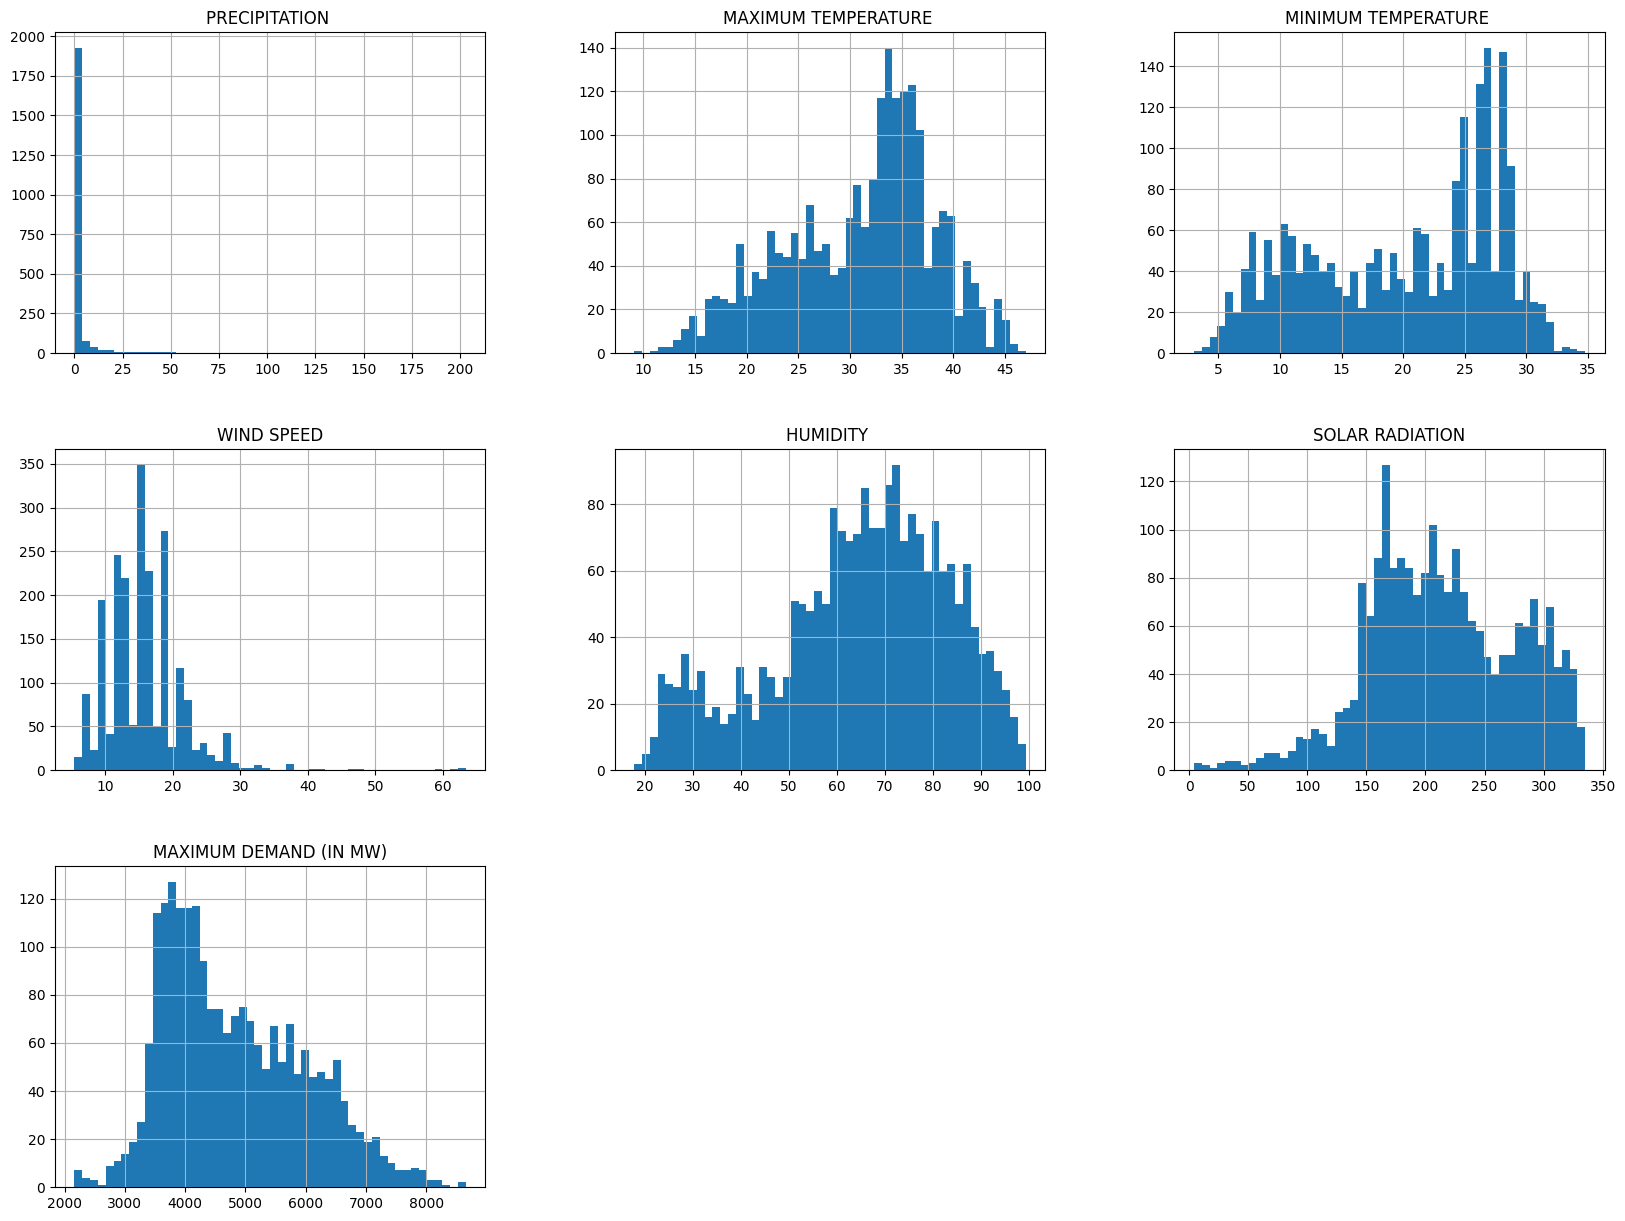

In [182]:
df.hist(bins=50, figsize=(20,15)) #plotting the histograms
plt.show()

In [183]:
df.isna().sum() #checking the missing values

,0
PRECIPITATION,0
MAXIMUM TEMPERATURE,0
MINIMUM TEMPERATURE,0
WIND SPEED,0
HUMIDITY,0
SOLAR RADIATION,0
MAXIMUM DEMAND (IN MW),0


                        PRECIPITATION   MAXIMUM TEMPERATURE   \
PRECIPITATION                 1.000000             -0.034459   
MAXIMUM TEMPERATURE          -0.034459              1.000000   
MINIMUM TEMPERATURE           0.094991              0.886137   
WIND SPEED                    0.099301              0.266695   
HUMIDITY                      0.273345             -0.623334   
SOLAR RADIATION              -0.266304              0.720122   
MAXIMUM DEMAND (IN MW)        0.080321              0.479377   

                        MINIMUM TEMPERATURE   WIND SPEED  HUMIDITY   \
PRECIPITATION                       0.094991    0.099301   0.273345   
MAXIMUM TEMPERATURE                 0.886137    0.266695  -0.623334   
MINIMUM TEMPERATURE                 1.000000    0.274914  -0.288594   
WIND SPEED                          0.274914    1.000000  -0.225671   
HUMIDITY                           -0.288594   -0.225671   1.000000   
SOLAR RADIATION                     0.486636    0.297923  -0.

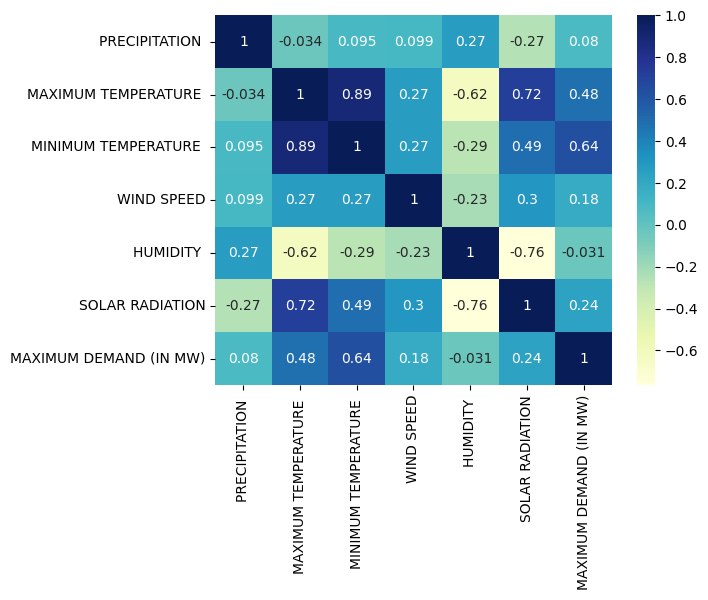

In [184]:
print(df.corr(numeric_only=True)) #It gives the correlation value between different numeric features (in our case all are numeric)
dataplot = sb.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True) #the same correlation can be shown as a heatmap

plt.show()

In [185]:
df_new = df

In [186]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox

# df_new is our DataFrame
# Transforming right-skewed columns
df_new['PRECIPITATION '] = np.log1p(df_new['PRECIPITATION '])  # log(1 + x) to handle zero values
df_new['WIND SPEED'] = np.log1p(df_new['WIND SPEED'])

# Transforming left-skewed columns using Box-Cox transformation
# Note: Box-Cox requires the data to be positive
for col in ['MAXIMUM TEMPERATURE ', 'MINIMUM TEMPERATURE ', 'HUMIDITY ', 'SOLAR RADIATION']:
    df_new[col], _ = boxcox(df_new[col] + 1)  # Adding 1 to ensure positivity

# Display transformed DataFrame
print(df_new.head())


   PRECIPITATION   MAXIMUM TEMPERATURE   MINIMUM TEMPERATURE   WIND SPEED  \
0             0.0            129.005631              8.042286    2.341806   
1             0.0            132.848050             11.595332    2.501436   
2             0.0            106.946057             10.042928    3.095578   
3             0.0             88.256286             11.770389    3.113515   
4             0.0            115.928694             11.073189    3.117950   

    HUMIDITY   SOLAR RADIATION  MAXIMUM DEMAND (IN MW)  
0  570.323407       259.352589                  4472.0  
1  576.755305       265.811099                  4228.0  
2  746.123324       270.125752                  4331.0  
3  806.623706       212.164234                  4461.0  
4  686.029168       267.787764                  4170.0  


# Train- Test Split

In [187]:

X = df_new.drop(columns = ['MAXIMUM DEMAND (IN MW)']) #X is dataframe of features and we will use this for modelling
y = df_new['MAXIMUM DEMAND (IN MW)'] # y is target variable
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 5) #the data is splited into train and test sets
# 80% of the data will be used for training the model
#20% of the data will be used to test the model and calculate the metrics


In [188]:
X_train

,PRECIPITATION,MAXIMUM TEMPERATURE,MINIMUM TEMPERATURE,WIND SPEED,HUMIDITY,SOLAR RADIATION
617,0.000000,267.696299,37.803177,2.639057,433.480621,381.955632
731,0.000000,162.090513,11.420777,2.509599,477.131354,328.481901
2141,0.000000,121.461977,8.042286,2.501436,407.142773,274.267268
1456,0.000000,106.064382,10.042928,2.867899,516.132498,291.984791
236,1.243866,253.624298,49.120468,2.639057,761.797844,225.899828
...,...,...,...,...,...,...
740,0.000000,191.456681,18.951357,2.639057,596.212344,348.367923
1032,0.000000,155.842679,19.723161,2.639057,618.554245,278.776198
2121,0.000000,167.374848,20.305928,2.151762,524.816022,258.456867
1424,0.000000,53.467918,10.042928,2.341806,931.292633,232.622988


#Preprocessing

In [189]:
# Creating Pipeline to scale our data
from sklearn.pipeline import Pipeline # importing Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler # importing StandardScaler and MinMaxScaler to scale our data
num_pipeline = Pipeline([
 ('min_max_scale', MinMaxScaler())
 ])
num_pipeline
# Though we have imported both StandardScaler and MinMaxScaler, we will use only Min Max Scaling

Pipeline(steps=[('min_max_scale', MinMaxScaler())])

In [190]:
X_train = num_pipeline.fit_transform(X_train) #fitting and transforming our  train data using the pipeline we just created
X_test = num_pipeline.transform(X_test) #transforming our test data using the pipeline we just created

In [191]:
X_train #our train data after fit and transforming scaling
#It is in array form

array([[0.        , 0.56900337, 0.51146122, 0.33903068, 0.38843397,
        0.65036464],
       [0.        , 0.31590811, 0.11528546, 0.28295948, 0.43648836,
        0.55819939],
       [0.        , 0.21853759, 0.06455177, 0.27942377, 0.35943906,
        0.46475714],
       ...,
       [0.        , 0.32857256, 0.24871083, 0.1279722 , 0.48898364,
        0.43750694],
       [0.        , 0.05558274, 0.09459476, 0.21028436, 0.93646716,
        0.39298067],
       [0.        , 0.44152718, 0.4428641 , 0.28646656, 0.38080466,
        0.55661764]])

In [192]:
X_test # our test data after transformation
#In array format

array([[0.34400457, 0.55051386, 0.68140924, 0.39141798, 0.75144845,
        0.50405484],
       [0.55758412, 0.34918595, 0.35117152, 0.59189215, 0.68166008,
        0.3595344 ],
       [0.        , 0.55051386, 0.53470964, 0.43814711, 0.13465561,
        0.85940055],
       ...,
       [0.        , 0.2052765 , 0.11006585, 0.54644983, 0.66646058,
        0.45358932],
       [0.        , 0.56900337, 0.68140924, 0.37179095, 0.63789493,
        0.58261496],
       [0.        , 0.52922819, 0.68140924, 0.55966156, 0.63640291,
        0.73801613]])

In [193]:
#Converting array to dataframe
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

In [194]:
X_train #our train data after scaling
#It is in dataframe form

,PRECIPITATION,MAXIMUM TEMPERATURE,MINIMUM TEMPERATURE,WIND SPEED,HUMIDITY,SOLAR RADIATION
0,0.000000,0.569003,0.511461,0.339031,0.388434,0.650365
1,0.000000,0.315908,0.115285,0.282959,0.436488,0.558199
2,0.000000,0.218538,0.064552,0.279424,0.359439,0.464757
3,0.000000,0.181636,0.094595,0.438147,0.479424,0.495294
4,0.233882,0.535278,0.681409,0.339031,0.749873,0.381393
...,...,...,...,...,...,...
1723,0.000000,0.386287,0.228370,0.339031,0.567583,0.592474
1724,0.000000,0.300935,0.239960,0.339031,0.592179,0.472529
1725,0.000000,0.328573,0.248711,0.127972,0.488984,0.437507
1726,0.000000,0.055583,0.094595,0.210284,0.936467,0.392981


In [195]:
X_test # our test data after transformation
#It is in dataframe form

,PRECIPITATION,MAXIMUM TEMPERATURE,MINIMUM TEMPERATURE,WIND SPEED,HUMIDITY,SOLAR RADIATION
0,0.344005,0.550514,0.681409,0.391418,0.751448,0.504055
1,0.557584,0.349186,0.351172,0.591892,0.681660,0.359534
2,0.000000,0.550514,0.534710,0.438147,0.134656,0.859401
3,0.000000,0.508252,0.414016,0.438147,0.340898,0.563897
4,0.000000,0.478825,0.433210,0.438147,0.365684,0.613839
...,...,...,...,...,...,...
428,0.000000,0.114185,0.045251,0.536760,0.397393,0.454209
429,0.000000,0.090706,0.141830,0.279424,0.807279,0.346543
430,0.000000,0.205276,0.110066,0.546450,0.666461,0.453589
431,0.000000,0.569003,0.681409,0.371791,0.637895,0.582615


In [196]:
print(df.columns)
df.columns = df.columns.str.strip() #Stripping the spaces from the column names

Index(['PRECIPITATION ', 'MAXIMUM TEMPERATURE ', 'MINIMUM TEMPERATURE ',
       'WIND SPEED', 'HUMIDITY ', 'SOLAR RADIATION', 'MAXIMUM DEMAND (IN MW)'],
      dtype='object')


##Checking Skewness before transforming
Skew = 0 implies Gaussian Distribution

Skew > 0 implies most of the data is on Left Side of Distribution means Right Skewed

Skew < 0 implies most of the data is on Right Side of Distribution means Left Skewed

In [197]:
#Checking Skewness of features before tranformation
from scipy.stats import skew
print(skew(df['MINIMUM TEMPERATURE']))
print(skew(df['MAXIMUM TEMPERATURE']))
print(skew(df['HUMIDITY']))
print(skew(df['SOLAR RADIATION']))
print(skew(df['PRECIPITATION']))
print(skew(df['WIND SPEED']))
print(skew(df['MAXIMUM DEMAND (IN MW)']))

-0.25919845103225486
-0.12187636105212891
-0.16284800639396685
-0.04703555491734166
2.708516953482465
0.07295795453284909
0.5443525119297502


# Regression Analysis

## Linear Regression

In [198]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [199]:
linear_model = LinearRegression()
linear_model

LinearRegression()

In [200]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [201]:
y_test

,MAXIMUM DEMAND (IN MW)
945,5204.0
424,3407.0
1544,4249.0
2100,3559.0
293,3958.0
...,...
1444,4831.0
1797,5257.0
4,4170.0
978,5265.0


In [202]:
linear_model_predict = pd.DataFrame(linear_model.predict(X_test))
linear_model_predict

,0
0,5666.741076
1,4360.835109
2,4600.480775
3,4425.955823
4,4527.071430
...,...
428,3181.538900
429,3949.042567
430,3879.312417
431,5718.495972


In [203]:
linear_model.score(X_test,y_test) #r2 score

0.4767324870824914

In [204]:
mean_absolute_error(y_test,linear_model.predict(X_test)) # mean absolute score

677.2083623808164

## Polynomial Regression

In [205]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
# Two steps:
# 1. Polynomial features of desired degree (here degree=2)
# 2. Linear regression
poly_model = Pipeline([
('polynomial_transform', PolynomialFeatures(degree=2)),
('linear_regression', LinearRegression())])
# Train with feature matrix Xs_train and label vector ys_train
poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomial_transform', PolynomialFeatures()),
                ('linear_regression', LinearRegression())])

In [206]:
poly_model_predict = pd.DataFrame(poly_model.predict(X_test))
poly_model_predict

,0
0,5596.535618
1,4118.255981
2,3912.048754
3,3703.160900
4,3721.595975
...,...
428,4943.305431
429,4723.303787
430,4365.067258
431,5358.293274


In [207]:
poly_model.score(X_test,y_test)

0.7738349842416934

In [208]:
mean_absolute_error(y_test,poly_model.predict(X_test))

430.5630451859042

## XgBoost

In [209]:
from xgboost import XGBRegressor
xgb_r = XGBRegressor(n_estimators = 10, random_state = 10)
# Fitting the model
xgb_r.fit(X_train, y_train)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*__sklearn_tags__.*")

In [236]:
y_test

,MAXIMUM DEMAND (IN MW)
945,5204.0
424,3407.0
1544,4249.0
2100,3559.0
293,3958.0
...,...
1444,4831.0
1797,5257.0
4,4170.0
978,5265.0


In [210]:
xgb_r_predict = pd.DataFrame(xgb_r.predict(X_test))
xgb_r_predict

,0
0,5970.797852
1,3931.769043
2,3674.816162
3,3697.104004
4,3697.104004
...,...
428,4648.821777
429,4784.786621
430,4435.737305
431,5461.309570


In [211]:
xgb_r.score(X_test,y_test)

0.7911324812470392

In [212]:
mean_absolute_error(y_test, xgb_r.predict(X_test))

410.2117469417581

## Hyperparameter Tuning the  XgBoost Model

In [213]:
from sklearn.model_selection import RandomizedSearchCV
import warnings

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9]
}

# Initialize XGBRegressor
xgb_model = XGBRegressor(random_state=42)

In [214]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter settings that are sampled
    scoring='r2',  # Use R2 score for evaluation
    n_jobs=-1,    # Use all available cores
    cv=5,         # 5-fold cross-validation
    verbose=1,
    random_state=42
)
random_search

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 0.9],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.5, 0.7, 0.9]},
                   random_state=42, scoring='r2', verbose=1)

In [215]:
# Fit the randomized search to the data
warnings.filterwarnings("ignore", category=FutureWarning, message=".*__sklearn_tags__.*")
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 0.9],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.5, 0.7, 0.9]},
                   random_state=42, scoring='r2', verbose=1)

In [216]:
# Print the best hyperparameters and the best score
print("Best hyperparameters:", random_search.best_params_)
print("Best R2 score:", random_search.best_score_)

Best hyperparameters: {'subsample': 0.5, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
Best R2 score: 0.7834186485325361


In [217]:
# Evaluate the best model on the test set
best_xgb_model = random_search.best_estimator_
test_r2 = best_xgb_model.score(X_test, y_test)
print("Test R2 score:", test_r2)

Test R2 score: 0.7856759151707919


<Figure size 20000x10000 with 0 Axes>

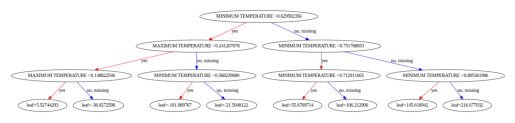

In [218]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

plt.figure(figsize=(200, 100))
plot_tree(best_xgb_model, num_trees=0)
plt.show()

In [219]:
mean_absolute_error(y_test, best_xgb_model.predict(X_test))

414.02630099325205

# Multi Layer Neural Network using Scikit- Learn

## Basic Model

In [220]:
from sklearn.neural_network import MLPRegressor

##Hyperperamter Tuning on M.L.P Model

In [221]:
mlp = MLPRegressor(max_iter=1000, random_state=42)

# Define the hyperparameter space
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100, 50)],
    'activation': ['relu', 'tanh'],  # Activation functions
    'solver': ['adam', 'sgd'],       # Optimizers
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization strength
    'learning_rate': ['constant', 'adaptive'],  # Learning rate strategies
    'learning_rate_init': [0.001, 0.01, 0.1],   # Initial learning rate
    'batch_size': [16, 32, 64],  # Mini-batch sizes
}

In [222]:
from sklearn.model_selection import RandomizedSearchCV
# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings sampled
    cv=3,       # 3-fold cross-validation
    scoring='r2',  # Scoring metric
    random_state=42,
    verbose=1,
    n_jobs=-1    # Use all available cores
)

In [223]:
# Fit the model
#random_search.fit(Xs_train, ys_train)

In [224]:
# Best hyperparameters
#print("Best Parameters:", random_search.best_params_)
# Best estimator
#best_model = random_search.best_estimator_

In [225]:
# Best Params:
''' Best Parameters: {'solver': 'adam', 'learning_rate_init': 0.1, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50,), 'batch_size': 64, 'alpha': 0.1, 'activation': 'tanh'}
'''

" Best Parameters: {'solver': 'adam', 'learning_rate_init': 0.1, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50,), 'batch_size': 64, 'alpha': 0.1, 'activation': 'tanh'}\n"

## Hyper-Tuned Model

In [226]:
mlp = MLPRegressor(solver ='adam', learning_rate_init= 0.1,learning_rate= 'adaptive', hidden_layer_sizes= (50,), batch_size= 64, alpha= 0.1, activation= 'tanh', random_state = 15, max_iter = 1000)

In [227]:
mlp.fit(X_train,y_train)

MLPRegressor(activation='tanh', alpha=0.1, batch_size=64,
             hidden_layer_sizes=(50,), learning_rate='adaptive',
             learning_rate_init=0.1, max_iter=1000, random_state=15)

In [228]:
mlp.predict(X_test)

array([5579.17824368, 4216.65664048, 4000.70368756, 3842.81630368,
       3846.86221312, 3884.78105151, 5592.23443661, 4081.9940403 ,
       5132.93086946, 3843.10662319, 4218.01673057, 5018.41717125,
       5335.7521223 , 6773.08066599, 5440.53796624, 4217.71925655,
       3861.71081884, 4054.19546871, 5558.85382546, 5452.06581923,
       4208.55965592, 6696.03091282, 6811.91679124, 3873.13756698,
       4195.55728162, 3849.61402811, 3844.82421917, 4858.05242493,
       5898.60919579, 6051.76672894, 5270.08773572, 6418.44912708,
       6156.13145787, 5902.57783314, 3844.26297899, 5961.77808098,
       5625.70012372, 3865.7037857 , 4073.29426092, 3841.35497813,
       5260.14845453, 5733.48162827, 5503.9741361 , 3969.52981084,
       4218.24160481, 5441.08359454, 6559.73161177, 5106.91499992,
       6669.21969253, 4218.21475489, 5593.36969607, 4146.05214815,
       4040.95922492, 3865.25162982, 5074.49160766, 4218.21232407,
       4715.14567802, 3841.34696376, 6612.2364554 , 6176.20893

In [229]:
mlp.score(X_test,y_test)

0.7438345737849933

In [230]:
mean_absolute_error(y_test, mlp.predict(X_test))

461.8958849573799

In [231]:
# The performance has significantly increased

## Cross Validation of Multi Layer Neural Network

In [232]:
''''
# List of different cross-validation fold values
cv_values = [5, 10, 20, 50]

# Initialize models
models = {'mlp': MLPRegressor(max_iter = 1000,solver ='adam', learning_rate_init= 0.1,learning_rate= 'adaptive', hidden_layer_sizes= (50,), batch_size= 64, alpha= 0.1, activation= 'tanh', random_state = 15)}

# Dictionary to store max R2 scores for each model and cv value
max_r2_scores = {model_name: {} for model_name in models.keys()}

# Loop through each model and cv value
for model_name, model in models.items():
    for cv in cv_values:
        # Try to get scores, handle AttributeError
        try:
            scores = cross_val_score(model, Xs_train, ys_train, cv=cv, scoring='r2')
            max_r2_score = np.max(scores)

        except AttributeError:
            print(f"AttributeError encountered for {model_name} with cv={cv}. Skipping...")
            max_r2_score = np.nan  # Assign NaN for failed cases

        max_r2_scores[model_name][cv] = max_r2_score
        print(f"Maximum R2 score for {model_name} with cv={cv}: {max_r2_score:.4f}")

print("\nMax R2 Scores Summary:")
print(max_r2_scores) '''

'\'\n# List of different cross-validation fold values\ncv_values = [5, 10, 20, 50]\n\n# Initialize models\nmodels = {\'mlp\': MLPRegressor(max_iter = 1000,solver =\'adam\', learning_rate_init= 0.1,learning_rate= \'adaptive\', hidden_layer_sizes= (50,), batch_size= 64, alpha= 0.1, activation= \'tanh\', random_state = 15)}\n\n# Dictionary to store max R2 scores for each model and cv value\nmax_r2_scores = {model_name: {} for model_name in models.keys()}\n\n# Loop through each model and cv value\nfor model_name, model in models.items():\n    for cv in cv_values:\n        # Try to get scores, handle AttributeError\n        try:\n            scores = cross_val_score(model, Xs_train, ys_train, cv=cv, scoring=\'r2\')\n            max_r2_score = np.max(scores)\n\n        except AttributeError:\n            print(f"AttributeError encountered for {model_name} with cv={cv}. Skipping...")\n            max_r2_score = np.nan  # Assign NaN for failed cases\n\n        max_r2_scores[model_name][cv] = m

In [233]:
# CV Scores is as follow:
'''
Maximum R2 score for mlp with cv=5: 0.7759
Maximum R2 score for mlp with cv=10: 0.7926
Maximum R2 score for mlp with cv=20: 0.8256
Maximum R2 score for mlp with cv=50: 0.8837

Max R2 Scores Summary:
{'mlp': {5: 0.7759172190804787, 10: 0.7925808459151684, 20: 0.8256236539963007, 50: 0.8837199759020116}}
'''

"\nMaximum R2 score for mlp with cv=5: 0.7759\nMaximum R2 score for mlp with cv=10: 0.7926\nMaximum R2 score for mlp with cv=20: 0.8256\nMaximum R2 score for mlp with cv=50: 0.8837\n\nMax R2 Scores Summary:\n{'mlp': {5: 0.7759172190804787, 10: 0.7925808459151684, 20: 0.8256236539963007, 50: 0.8837199759020116}}\n"

In [234]:
pip install nnv

## Visualization of Neural Network

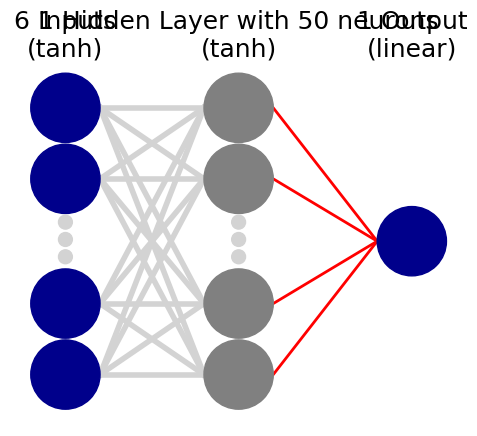

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [235]:
from nnv import NNV

layersList = [
    {"title":"6 Inputs\n(tanh)", "units": 6, "color": "darkBlue"},
    {"title":"1 Hidden Layer with 50 neurons\n(tanh)", "units": 50,"edges_color":"red", "edges_width":2},
    {"title":"1 Output\n(linear)", "units": 1,"color": "darkBlue"},
]
NNV(layersList).render(save_to_file="my_example.png")